<a href="https://colab.research.google.com/github/mjvakili/MLcourse/blob/master/day2/nn_qso_finder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Let's start by importing the libraries that we need for this exercise.

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib
from sklearn.model_selection import train_test_split
#matplotlib settings
matplotlib.rcParams['xtick.major.size'] = 7
matplotlib.rcParams['xtick.labelsize'] = 'x-large'
matplotlib.rcParams['ytick.major.size'] = 7
matplotlib.rcParams['ytick.labelsize'] = 'x-large'
matplotlib.rcParams['xtick.top'] = False
matplotlib.rcParams['ytick.right'] = False
matplotlib.rcParams['ytick.direction'] = 'in'
matplotlib.rcParams['xtick.direction'] = 'in'
matplotlib.rcParams['font.size'] = 15
matplotlib.rcParams['figure.figsize'] = [7,7]

In [2]:
#We need the astroml library to fetch the photometric datasets of sdss qsos and stars
pip install astroml

In [0]:
from astroML.datasets import fetch_dr7_quasar
from astroML.datasets import fetch_sdss_sspp

quasars = fetch_dr7_quasar()
stars = fetch_sdss_sspp()

In [0]:
# Data procesing taken from 
#https://www.astroml.org/book_figures/chapter9/fig_star_quasar_ROC.html by Jake Van der Plus

# stack colors into matrix X
Nqso = len(quasars)
Nstars = len(stars)
X = np.empty((Nqso + Nstars, 4), dtype=float)

X[:Nqso, 0] = quasars['mag_u'] - quasars['mag_g']
X[:Nqso, 1] = quasars['mag_g'] - quasars['mag_r']
X[:Nqso, 2] = quasars['mag_r'] - quasars['mag_i']
X[:Nqso, 3] = quasars['mag_i'] - quasars['mag_z']

X[Nqso:, 0] = stars['upsf'] - stars['gpsf']
X[Nqso:, 1] = stars['gpsf'] - stars['rpsf']
X[Nqso:, 2] = stars['rpsf'] - stars['ipsf']
X[Nqso:, 3] = stars['ipsf'] - stars['zpsf']

y = np.zeros(Nqso + Nstars, dtype=int)
y[:Nqso] = 1

In [0]:
X = X/np.max(X, axis=0)

In [0]:
# split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.9)

In [7]:
#Now let's build a simple Sequential model in which fully connected layers come after one another
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(), #this flattens input
  tf.keras.layers.Dense(128, activation = "relu"),
  tf.keras.layers.Dense(64, activation = "relu"),
  tf.keras.layers.Dense(32, activation = "relu"),
  tf.keras.layers.Dense(32, activation = "relu"),
  tf.keras.layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer='adam', loss='binary_crossentropy')
history = model.fit(X_train, y_train, validation_data = (X_test, y_test), batch_size = 32, epochs=20, verbose = 1)


Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 389738 samples, validate on 43305 samples
Epoch 1/20
389738/389738 [==============================] - 24s 61us/sample - loss: 0.0495 - val_loss: 0.0281
Epoch 2/20
389738/389738 [==============================] - 23s 59us/sample - loss: 0.0311 - val_loss: 0.0275
Epoch 3/20
389738/389738 [==============================] - 23s 59us/sample - loss: 0.0290 - val_loss: 0.0336
Epoch 4/20
389738/389738 [==============================] - 23s 58us/sample - loss: 0.0278 - val_loss: 0.0261
Epoch 5/20
389738/389738 [==============================] - 23s 58us/sample - loss: 0.0269 - val_loss: 0.0238
Epoch 6/20
389738/389738 [==============================] - 25s 64us/sample - loss: 0.0263 - val_loss: 0.0231
Epoch 7/20
389738/389738 [==============================] - 23s 58us/sample - loss: 0.0259 - val_loss: 0.0250
Epoc

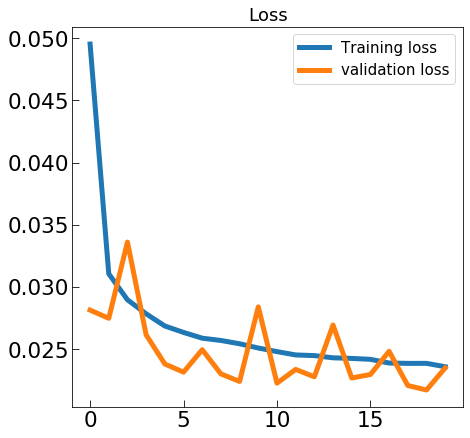

In [8]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(loss))
plt.plot(epochs, loss,  lw = 5, label='Training loss')
plt.plot(epochs, val_loss,  lw = 5, label='validation loss')

plt.title('Loss')
plt.legend(loc=0)
plt.show()

In [0]:
prob = model.predict_proba(X_test) #model probabilities

In [0]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve

In [0]:
fpr, tpr, thresholds = roc_curve(y_test, prob)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  after removing the cwd from sys.path.


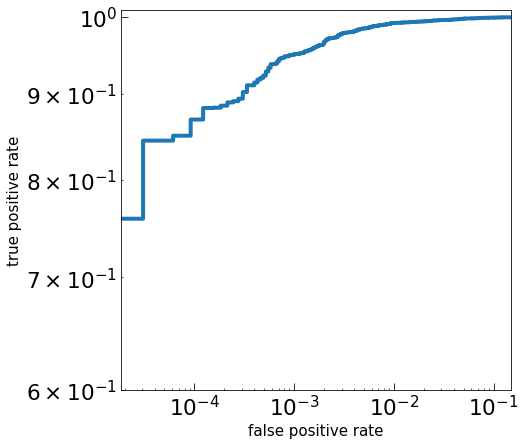

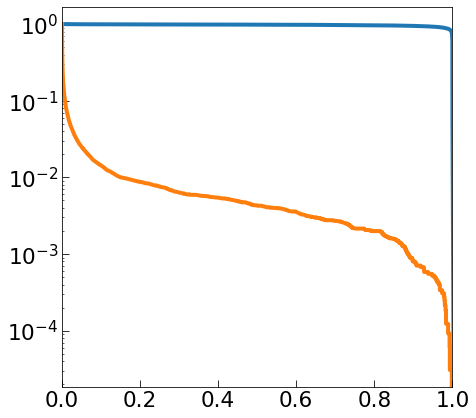

In [12]:
plt.loglog(fpr, tpr, lw = 4)
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.xlim(0.0, 0.15)
plt.ylim(0.6, 1.01)
plt.show()

plt.plot(thresholds, tpr, lw = 4)
plt.plot(thresholds, fpr, lw = 4)
plt.xlim(0,1)
plt.yscale("log")
plt.show()
#plt.xlabel('false positive rate')
#plt.ylabel('true positive rate')
##plt.xlim(0.0, 0.15)
#plt.ylim(0.6, 1.01)

In [13]:
#Now let's look at the confusion matrix
y_pred = model.predict(X_test)
z_pred = np.zeros(y_pred.shape[0], dtype = int)
mask = np.where(y_pred>.5)[0]
z_pred[mask] = 1
confusion_matrix(y_test, z_pred.astype(int))

array([[32474,   139],
       [  194, 10498]])

In [0]:
import os, signal
os.kill(os.getpid(), signal.SIGKILL)

#Exercise1:

Try to change the number of layers, batchsize, as well as the default learning rate, one at a time. See which one can make a more significant impact on the performance of the model.

#Exercise 2:
Write a simple function for visualizing the predicted decision boundaries in the feature space. Try to identify the regions of the parameter space which contribute significantly to the false positive rates.

#Exercise 3:
This dataset is a bit imbalanced in that the QSOs are outnumbered by the stars. Can you think of a wighting scheme to pass to the loss function, such that the detection rate of QSOs increases?